In [1]:
# Customer Segementation Project understanding retail analysis

In [2]:
!pip list

Package               Version
--------------------- ------------
absl-py               1.3.0
altair                4.1.0
anyio                 3.6.2
argon2-cffi           21.3.0
argon2-cffi-bindings  21.2.0
astor                 0.8.1
async-generator       1.10
attrs                 22.2.0
Babel                 2.11.0
backcall              0.2.0
backports.zoneinfo    0.2.1
beautifulsoup4        4.12.3
bleach                4.1.0
blinker               1.5
cached-property       1.5.2
cachetools            4.2.4
certifi               2025.1.31
cffi                  1.15.1
charset-normalizer    2.0.12
click                 8.0.4
colorama              0.4.5
comm                  0.1.4
commonmark            0.9.1
contextvars           2.4
cycler                0.11.0
dataclasses           0.8
decorator             5.1.1
defusedxml            0.7.1
EasyProcess           1.1
entrypoint2           1.1
entrypoints           0.4
et-xmlfile            1.1.0
future                0.18.2
gast       

In [4]:
import pandas as pd
 
#Loading the Dataset
file_path = "D:\Projects_DA\Online Retail.xlsx"
df = pd.read_excel("D:\Projects_DA\Online Retail.xlsx", engine="openpyxl")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#!pip install xlrd openpyxl

In [ ]:
#!pip install openpyxl

In [6]:
df.dropna(subset = ['CustomerID'], inplace=True) #dropping Null values

In [7]:
#Converting InvoiceDate to datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [10]:
#Creating a TotalRevenue Column

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [11]:
df['TotalRevenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalRevenue, Length: 406829, dtype: float64

In [13]:
#Removing the Refunds Value(Negative Values

df = df[df['TotalRevenue'] > 0]

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
 # RFM Metrics
    
from datetime import datetime

#Defining the most recent purchase date 
latest_date = df['InvoiceDate'].max()

In [17]:
#Computing RFM MEtrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x :(latest_date - x.max()).days,  #RECENCY
    'InvoiceNo' : 'count', #FREQUENCY
    'TotalRevenue' : 'sum' #Monetary
})

In [18]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


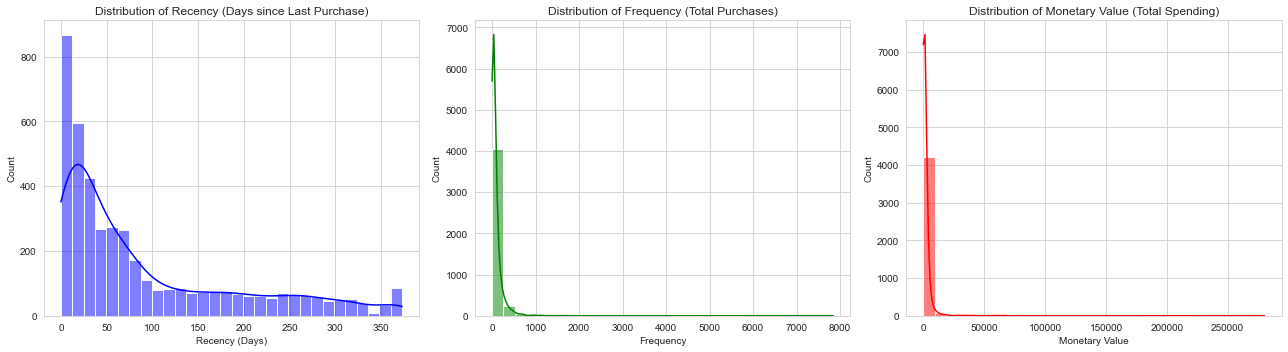

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style("whitegrid")

# Create a figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Distribution
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Recency (Days since Last Purchase)')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Count')

# Frequency Distribution
sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Frequency (Total Purchases)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Count')

# Monetary Distribution
sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Monetary Value (Total Spending)')
axes[2].set_xlabel('Monetary Value')
axes[2].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Apply Min-MAx scaling
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm)

#Convert back to DataFrame

rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])


#Show normalized RFM data

rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.871314,0.000000,0.275443
1,0.002681,0.023069,0.015368
2,0.198391,0.003824,0.006401
3,0.048257,0.009177,0.006259
4,0.828418,0.002039,0.001180


In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

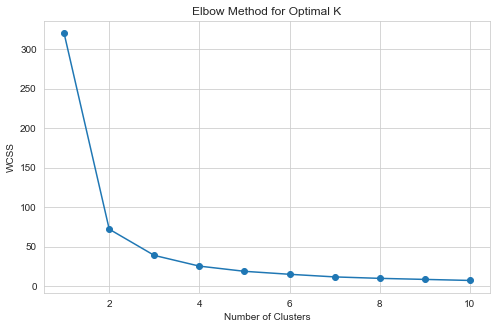

In [25]:
wcss = [] #Stores the sum of squared distance

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    
#Plotiing the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [26]:
#Applying K-means clustering with K=4 (adjust based on the elbow curve)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

#Adding CLuster labels to  original RFM dataset

rfm['Cluster'] = rfm_scaled['Cluster']

#Showing Customer with assigned Clusters
rfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,1,77183.60,NaN
12347.0,1,182,4310.00,NaN
12348.0,74,31,1797.24,NaN
12349.0,18,73,1757.55,NaN
12350.0,309,17,334.40,NaN


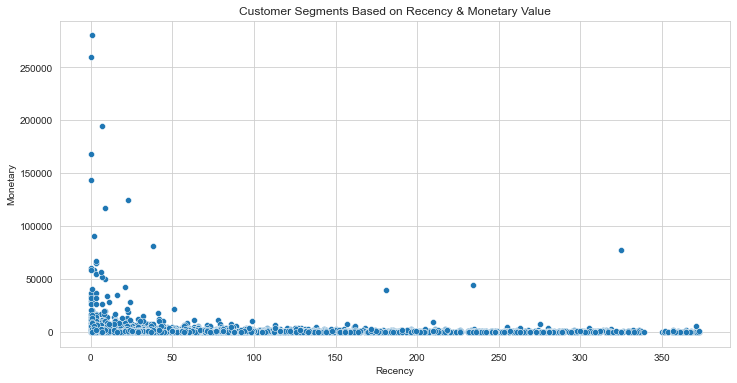

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette="Set2")
plt.title("Customer Segments Based on Recency & Monetary Value")
plt.show()
